# Exploración visual de los datos 

En esta última sección se realiza una exploración visual de los datos, para eso realizo 3 consultas a las 3 tablas que tienen datos relevantes para el análisis (pues 'catalog' es simplemente un catálogo), pero teniendo en cuenta que al unirlas con 'catalog' obtengo una descripción de los id mencionados en la sección anterior ('2_consultas'). 

Entonces, instancio las tres tablas 'test_projects', 'test_rules' y 'test_transactions', utilizando las librerías de Python 'matplotlib' y 'seaborn' para visualizar los datos. 

Comienzo importando librería y conectando SQL con Python mediante psycopg2.  

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import psycopg2 as pg2  

database='Ubank'
user= #####
password= #####

conn = pg2.connect(database='Ubank', user= user, password= password)

## test_projects

In [3]:
projects = pd.read_sql("""SELECT user_id, total, project_name_cat, 
                                 CAST (EXTRACT(YEAR FROM goal_date) AS VARCHAR), 
                                 CAST (EXTRACT(MONTH FROM goal_date) AS VARCHAR)                                  
                          FROM catalog
                          INNER JOIN test_projects
                          ON catalog.project_id = test_projects.project_category_id""", conn)

In [4]:
# Ups, olvidé cambiar nombre de columnas con ALTER y otras hierbas de SQL, lo hago ahora 
projects['year'] = projects.iloc[:,3] 
projects['month'] = projects.iloc[:,4] 

projects.drop('date_part',axis=1,inplace=True)

In [5]:
projects.head()

,user_id,total,project_name_cat,year,month
0,700b1ad8bcb948d2b948c20d8e4160cd,5000.0,Hogar,2020,6
1,cf91c22c0f7c4cc8917af73c1f0b7fa7,3000.0,Solo ahorrar,2020,1
2,e4eb05de0b454a17b4f9f556bb70e9c1,5000.0,Solo ahorrar,2020,2
3,a821b4c74ec4467e9170db0a499fa082,5000.0,Comprar algo,2022,2
4,2de353a9a926462d86a6009cabbfa1a4,40000.0,Solo ahorrar,2021,1


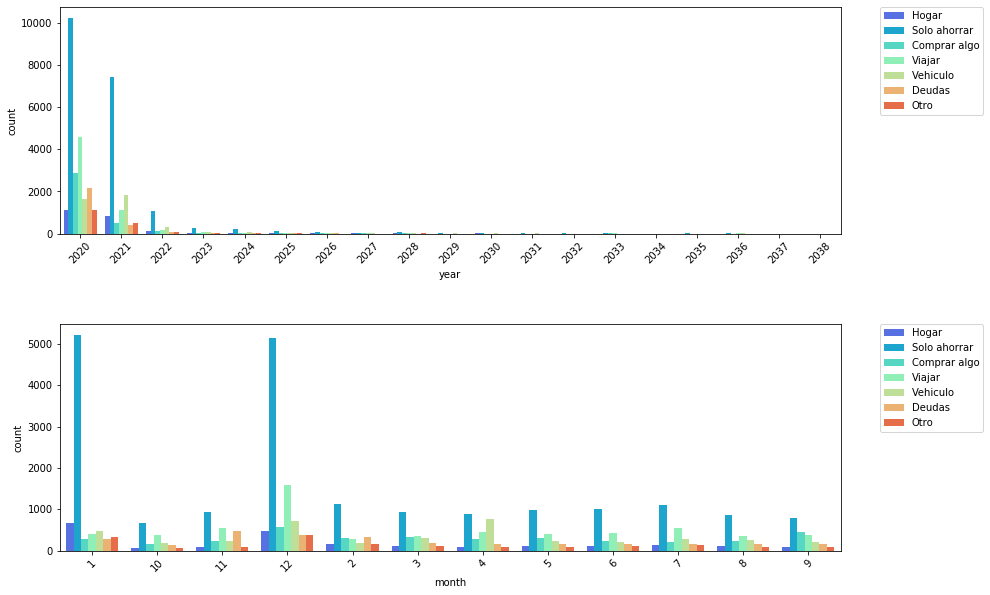

In [104]:
# Veamos cantidad de metas qeu se proponen los usuarios por Año y por Mes

fig = plt.figure(figsize=(14, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 1, 1)
sns.countplot(x='year', data=projects, palette='rainbow', hue='project_name_cat', ax=ax)
plt.xticks(rotation=45)
plt.legend(loc=2, bbox_to_anchor = (1.05,1), borderaxespad=0.)

ax = fig.add_subplot(2, 1, 2)
sns.countplot(x='month', data=projects, palette='rainbow', hue='project_name_cat', ax=ax)
plt.xticks(rotation=45)
plt.legend(loc=2, bbox_to_anchor = (1.05,1), borderaxespad=0.)

**Año:** En el gráfico de Años (year) se observa que la mayoría de las metas se dan en el corto plazo (años 2020 a 2022), siendo el año 2020 el de mayor cantidad. Puede interpretarse que el comportamiento de ahorro en general es a corto plazo. 

Además, el proyecto que predomina en todos los años es el de 'Solo Ahorrar'. En 2020 le sigue el proyecto 'Viajar' y en 2021 'Vehículo'. Lo cual tiene cierta lógica ya que un es más costoso que un viaje random. 

**Mes:** En el gráfico de Meses (month) se observa un patrón similar al de años. Además, la mayoría de las metas son para los meses de Enero y Diciembre. Particularmente en Diciembre se observa que las metas de 'Viajar' aumentan. Tiene sentido ya que en esta época del año se busca vacacionar.  


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]), <a list of 7 Text xticklabel objects>)

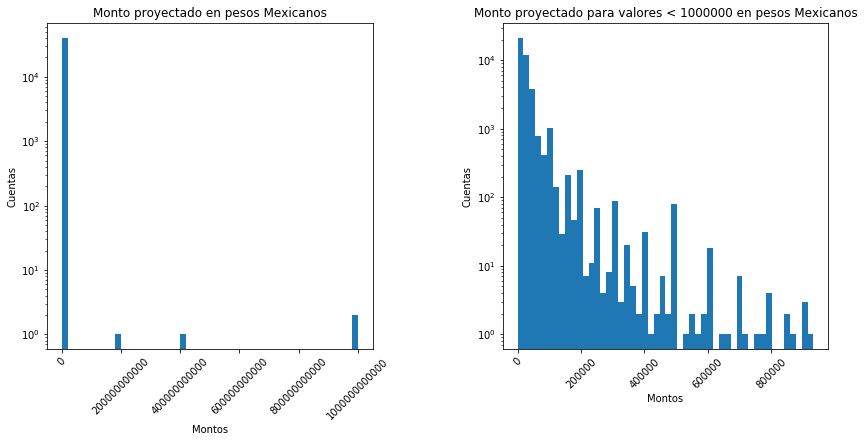

In [46]:
# Histogramas de monto a ahorrar

fig = plt.figure(figsize=(14, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
ax = fig.add_subplot(1, 2, 1)
ax.hist(projects['total'], bins = 50, log = True)
plt.xlabel('Montos')
plt.ylabel('Cuentas')
plt.title('Monto proyectado en pesos Mexicanos')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

ax = fig.add_subplot(1, 2, 2)
ax.hist(projects[projects['total']<1000000]['total'], bins = 50, log = True)
plt.xlabel('Montos')
plt.ylabel('Cuentas')
plt.title('Monto proyectado para valores < 1000000 en pesos Mexicanos')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

En estos gráfico puede verse que la mayoría de los montos van entre 0 y 1000000 pesos Mexicanos. Y hay montos muy grandes, pero en mucha menor proporción. Puede interpretarse que las metas de ahorro no son tan ambiciosas aunque hay algunas que sí lo son. 

## test_rules 

In [57]:
rules = pd.read_sql("""SELECT project_name_cat, amount, frecuency   
                       FROM catalog
                       INNER JOIN test_rules
                       ON catalog.project_id = test_rules.rule_type""", conn)

In [58]:
rules.head()

,project_name_cat,amount,frecuency
0,Redondear,10.0,0
1,Monto fijo,228.0,7
2,Placer culpable,5.0,0
3,Monto fijo,1667.0,15
4,% de mi sueldo,20.0,0


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

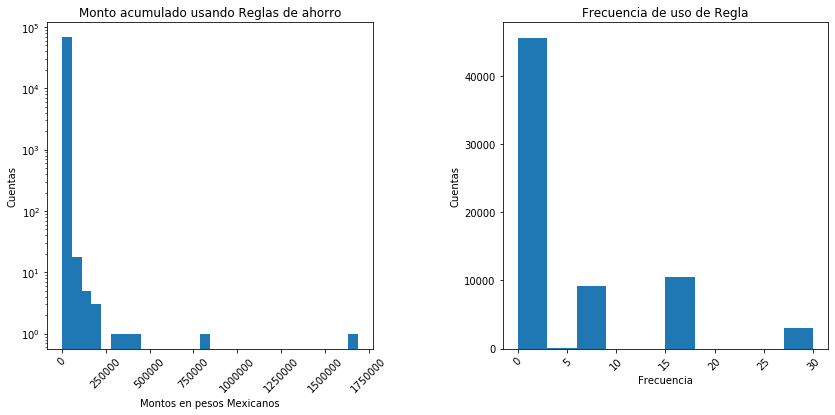

In [66]:
# Histograma de monto a ahorrar por regla, y frecuencia de su uso

fig = plt.figure(figsize=(14, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
ax = fig.add_subplot(1, 2, 1)
ax.hist(rules['amount'], bins = 30, log = True)
plt.xlabel('Montos en pesos Mexicanos')
plt.ylabel('Cuentas')
plt.title('Monto acumulado usando Reglas de ahorro')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

ax = fig.add_subplot(1, 2, 2)
ax.hist(rules['frecuency'], bins = 10)
plt.xlabel('Frecuencia')
plt.ylabel('Cuentas')
plt.title('Frecuencia de uso de Regla')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

**Monto Acumulado por uso de regla:** Aquí se observa que la mayoría de los montos ahorrados aplicando las distintas reglas son menores a 50000 pesos Mexicanos, podría hacer un análisis de los valroes en este rango como en el gráfico de Montos proyectados. 

**Frecuencia de uso de regla:** Por otro lado, la frecuencia de uso de las reglas en general es baja o nula aunque algunas reglas se implenetan con cierta frecuencia considerable, particularmente frecuencias de 15 y 17.5 aproximadamente.  

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

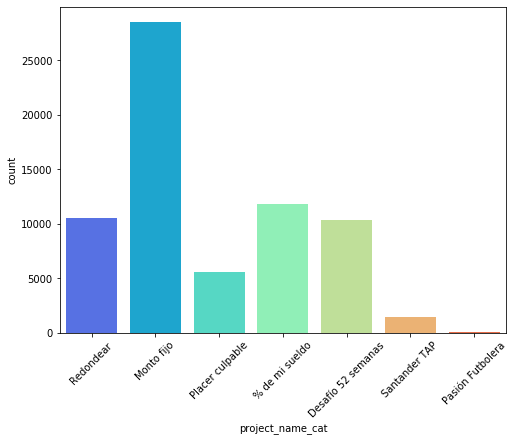

In [70]:
# Finalmente veamos que reglas son las más usadas

fig = plt.figure(figsize=(8, 6))
sns.countplot(x='project_name_cat', data=rules, palette='rainbow')#, hue='project_name_cat', ax=ax)
plt.xticks(rotation=45)

Claramente la regla más usada es la de 'Monto fijo' seguida por '% de sueldo', 'Desafío 52 semanas' y 'Redondear'.  

## test_transactions 

In [71]:
transactions = pd.read_sql("""SELECT user_id, transaction_date, amount,
                                     CAST (EXTRACT(YEAR FROM transaction_date) AS VARCHAR), 
                                     CAST (EXTRACT(MONTH FROM transaction_date) AS VARCHAR),
                                     CAST (EXTRACT(DAY FROM transaction_date) AS VARCHAR)
                              FROM test_transactions""", conn)

In [72]:
# Como antes, olvidé cambiar nombre de columnas con ALTER y otras hierbas de SQL, lo hago ahora. 
transactions['year'] = transactions.iloc[:,3] 
transactions['month'] = transactions.iloc[:,4] 
transactions['day'] = transactions.iloc[:,5] 

transactions.drop('date_part',axis=1,inplace=True)

In [73]:
transactions.head()

,user_id,transaction_date,amount,year,month,day
0,0001c38e1231436eb1218b4caf1090d6,2019-12-06,-335.0,2019,12,6
1,0001c38e1231436eb1218b4caf1090d6,2020-01-17,-1000.0,2020,1,17
2,0001c38e1231436eb1218b4caf1090d6,2019-11-30,-99.0,2019,11,30
3,0001c38e1231436eb1218b4caf1090d6,2019-12-01,-562.0,2019,12,1
4,0001c38e1231436eb1218b4caf1090d6,2020-01-04,-169.0,2020,1,4


(array([-25000., -20000., -15000., -10000.,  -5000.,      0.,   5000.,
         10000.,  15000.,  20000.,  25000.]),
 <a list of 11 Text xticklabel objects>)

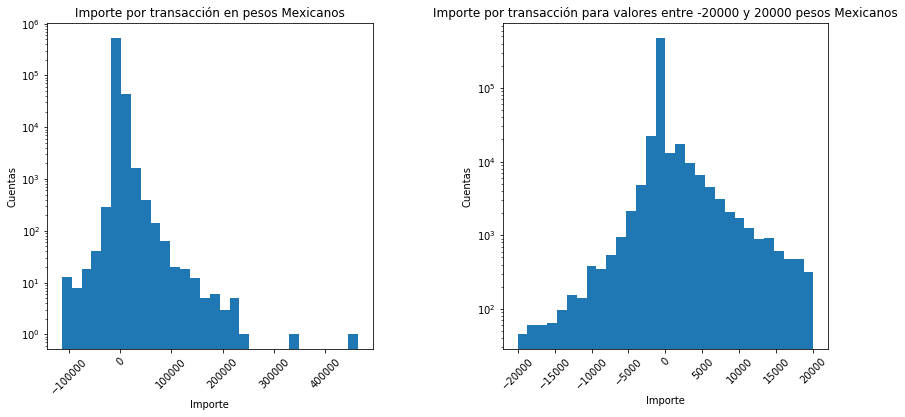

In [76]:
# Veamos los importes por transacción 

fig = plt.figure(figsize=(14, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
ax = fig.add_subplot(1, 2, 1)
ax.hist(transactions['amount'], bins = 30, log = True )
plt.xlabel('Importe')
plt.ylabel('Cuentas')
plt.title('Importe por transacción en pesos Mexicanos')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

ax = fig.add_subplot(1, 2, 2)
ax.hist(transactions[(transactions['amount']<20000) & (transactions['amount']>-20000)]['amount'], bins = 30, log = True )
plt.xlabel('Importe')
plt.ylabel('Cuentas')
plt.title('Importe por transacción para valores entre -20000 y 20000 pesos Mexicanos' )
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)

Acá se observa que en general la mayoría de las transacciones son entre los -20000 y 20000 pesos Mexicanos. Incluso observando el gráfico dentro de esto rango se observa que la mayoría son transacciones en un rango aún menor. Esto es naturalmente lógico, las personas realizan con más frecuencia transacciones pequeñas y con menor frecuencia transacciones de gran volumen.  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

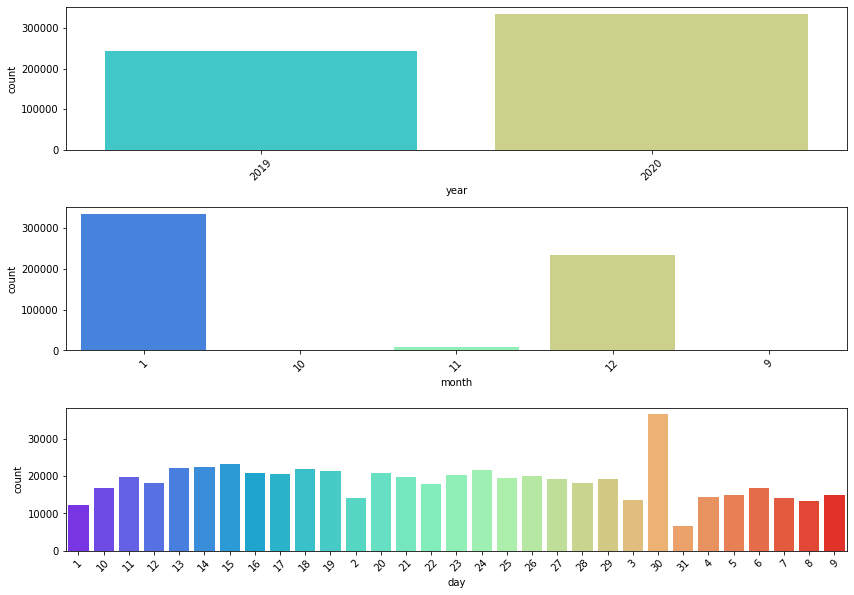

In [171]:
# Finalmente veamos transacciones por intervalos temporales: Año, Mes y Día 
fig = plt.figure(figsize=(14, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 1, 1)
sns.countplot(x='year', data=transactions, palette='rainbow', ax=ax)
plt.xticks(rotation=45)

ax = fig.add_subplot(3, 1, 2)
sns.countplot(x='month', data=transactions, palette='rainbow', ax=ax)
plt.xticks(rotation=45)

ax = fig.add_subplot(3, 1, 3)
sns.countplot(x='day', data=transactions, palette='rainbow', ax=ax)
plt.xticks(rotation=45)

**Año:** Se observa que en el número de transacciones aumentó de 2019 a 2020.

**Mes:** La mayor cantidad de transacciones se dió en el mes de Enero, seguido por Diciembre. Esto tiene sentido pues la gente realiza transacciones y consume más en épocas de vacaciones. El turismo estacional es muy marcado. 

**Día:** Se observa que la mayor parte de transacciónes ocurre el día 30 y en general la tendencia es que ocurren menos transacciones a fin de mes. Naturalente el 31 hay menos transacciones, no todos los meses tienen 31 días. 